In [1]:
import pandas as pd
import glob
import os
import numpy as np
import pickle
import statistics
import community
import matplotlib as mlp
# mlp.use("Qt5Agg")
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

import analysis as an
import pandas as pd
import statsmodels as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

# from visbrain.objects import BrainObj, ColorbarObj, SceneObj, SourceObj
# from visbrain.io import download_file, read_stc

# from nilearn.connectome import ConnectivityMeasure

# from nilearn import plotting
#plt.matshow(rwd_mean_correlation_matrix,cmap='hot')

import numpy as np
import seaborn as sns

from scipy import stats as spy_stats
import scipy
import pprint as pp

In [ ]:
basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/'

In [85]:
labels = pd.read_csv(os.path.join(basepath,'tmp','mod_labels.csv'), sep=',')

In [ ]:
labels

In [86]:
labels.set_index('Index', inplace=True)

In [ ]:
labels.head()

In [ ]:
note_dict={}
for i,j in labels.iterrows():
    print(i)
    print(j['area'])
    note_dict[i]=j['area']

In [ ]:
note_dict

In [ ]:
summary_dict=an.onetoughjar(os.path.join(basepath,'tmp','5_summary_dict_07-31-2020_12-26-08'))

In [ ]:
summary_dict['NR']['ov']['modules'].keys()

In [ ]:
for key, value in summary_dict['NR'].items():
    for subkey, subvalue in value.items():
#         print(subkey)
        if subkey == 'modules':
            print(subvalue.keys())
            summary_dict['NR'][key][subkey]['Q']=community.modularity(subvalue['partition'], subvalue['graph'], weight='weight')

In [ ]:
print(summary_dict['NR']['no']['modules']['Q'])
print(summary_dict['NR']['ov']['modules']['Q'])
print(summary_dict['NR']['ob']['modules']['Q'])

In [ ]:
for key, value in summary_dict['NR'].items():
    for subkey, subvalue in value.items():
#         print(subkey)
        if subkey == 'modules':
            print(subvalue.keys())
            summary_dict['NR'][key][subkey]['dendrogram']=community.generate_dendrogram(subvalue['graph'],   weight='weight')

In [ ]:
x = summary_dict['NR']['ob']['modules']['dendrogram']

In [ ]:
G=nx.erdos_renyi_graph(100, 0.01)
dendo = community.generate_dendrogram(G)

for level in range(len(x) - 1) :
    print("partition at level", level,"is", community.partition_at_level(dendo, level))


In [ ]:
#summary_dict=an.onetoughjar(os.path.join(basepath,'tmp','5_summary_dict_12-05-2019_03-29-19'))

summary_dict['NR']['no']['graphs'].nodes(data=True)

x=an.grace_graph(summary_dict['NR']['no']['graphs'],'Normal weight', thresh= 97, metric = 'centrality', position='spectral', basepath = basepath)

y=an.grace_graph(summary_dict['NR']['ov']['graphs'],  'Overweight',   thresh= 97, metric = 'centrality', position='spectral', basepath = basepath)

z=an.grace_graph(summary_dict['NR']['ob']['graphs'], 'Obese',  thresh= 97, metric = 'centrality', position='spectral',basepath = basepath)





In [ ]:
summary_dict['NR']['no']['graphs'].nodes(data=True)

In [ ]:
# basepath='/Users/gracer/Google Drive/HCP_graph/1200/datasets/'
demo_dict=an.onetoughjar(os.path.join(basepath,'tmp','demo_dict_11-13-2019_02-07-22'))


In [ ]:
demo_dict['NR'].values()

In [ ]:
demos=pd.DataFrame.from_dict(demo_dict['NR'], orient='index')

In [ ]:
# demos.to_csv(os.path.join(basepath,'demos.csv'), sep=',')

In [ ]:
print(z.sort_values(by=['degree'], ascending=False).head())
print(y.sort_values(by=['degree'], ascending=False).head())
print(x.sort_values(by=['degree'], ascending=False).head())

# Full graph metrics

In [ ]:
basepath='/Users/gracer/Google Drive/HCP_graph/1200/datasets/'
#Load data from pickle if needed
# save_dict=an.onetoughjar(os.path.join(basepath,'tmp','save_dict_11-14-2019_02-46-01'))

In [ ]:
stat_dict={'MZ':{'mean_FC':{'no':{},'ov':{},'ob':{}}, 'clustering_coeff':{'no':{},'ov':{},'ob':{}}, 'btn_centrality':{'no':{},'ov':{},'ob':{}}, 'PC':{'no':{},'ov':{},'ob':{}}},
           'DZ':{'mean_FC':{'no':{},'ov':{},'ob':{}}, 'clustering_coeff':{'no':{},'ov':{},'ob':{}}, 'btn_centrality':{'no':{},'ov':{},'ob':{}}, 'PC':{'no':{},'ov':{},'ob':{}}},
           'NR':{'mean_FC':{'no':{},'ov':{},'ob':{}}, 'clustering_coeff':{'no':{},'ov':{},'ob':{}}, 'btn_centrality':{'no':{},'ov':{},'ob':{}}, 'PC':{'no':{},'ov':{},'ob':{}}}}

In [ ]:
stat_dict={'MZ':{'mean_FC':{'no':{},'ov':{},'ob':{}}, 'clustering_coeff':{'no':{},'ov':{},'ob':{}}, 'btn_centrality':{'no':{},'ov':{},'ob':{}}, 'PC':{'no':{},'ov':{},'ob':{}}},
           'DZ':{'mean_FC':{'no':{},'ov':{},'ob':{}}, 'clustering_coeff':{'no':{},'ov':{},'ob':{}}, 'btn_centrality':{'no':{},'ov':{},'ob':{}}, 'PC':{'no':{},'ov':{},'ob':{}}},
           'NR':{'mean_FC':{'no':{},'ov':{},'ob':{}}, 'clustering_coeff':{'no':{},'ov':{},'ob':{}}, 'btn_centrality':{'no':{},'ov':{},'ob':{}}, 'PC':{'no':{},'ov':{},'ob':{}}}}
for key, value in save_dict.items():
    for subkey,subval in value.items():
        for k,v in subval.items():
            if k in ['mean_FC','clustering_coeff','btn_centrality','PC']:
                stat_dict[key][k][subkey]=pd.DataFrame.from_dict(v, 'index')
                new_name=[]
                for item in list(stat_dict[key][k][subkey].columns[0:100]):
                    new_name.append('IC_%s'%(item+1))
                stat_dict[key][k][subkey].columns=new_name
                stat_dict[key][k][subkey]['group'] = subkey

for key, value in stat_dict.items():
    print(key)
    for k,v in value.items():
        print(k)
        df = pd.concat([v['no'],v['ov']], axis=0)
        df = pd.concat([df,v['ob']], axis=0)
        if k in ['clustering_coeff', 'btn_centrality', 'PC']:
            keys = []
            tables = []
            for variable in list(df.columns)[0:100]:
                m='%s ~ group'%variable
                model = ols(m, data=df).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)

                keys.append(variable)
                tables.append(anova_table)

            df_anova = pd.concat(tables, keys=keys, axis=0)
            raw_p=df_anova['PR(>F)'].dropna()
            fdr=st.stats.multitest.fdrcorrection(raw_p, alpha=0.05, method='indep', is_sorted=False)
            stat_dict[key][k].update({'full':df, 'anova':df_anova, 'FDR':fdr})
        else:
            print(df)
            keys = []
            tables = []
            variable='IC_1'
            m='%s ~ group'%variable
            model = ols(m, data=df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)

            keys.append(variable)
            tables.append(anova_table)

            df_anova = pd.concat(tables, keys=keys, axis=0)
            raw_p=df_anova['PR(>F)'].dropna()
            fdr=st.stats.multitest.fdrcorrection(raw_p, alpha=0.05, method='indep', is_sorted=False)
            stat_dict[key][k].update({'full':df, 'anova':df_anova, 'FDR':fdr})



In [ ]:
stat_dict['NR'].keys()

In [ ]:
for key, value in stat_dict.items():
    for subkey,subval in value.items():
        for k,v in subval.items():
            if k == 'FDR':
                s = set(v[0])
                if True in s:
                    print('there is a significant value here %s %s'%(key,subkey))
                    print(stat_dict[key][subkey]['FDR'][1])
                    print(stat_dict[key][subkey]['anova'])
                

In [ ]:
df=stat_dict['MZ']['btn_centrality']['full']
m='%s ~ group'%'IC_2'
model = ols(m, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
model.summary()

Did not find any differences in the nodal metrics between groups in the not related condition  
IC_2 shows significantly different betweenness centrality between the obese and normal weight monozygotic twin subset. Probably due to a false discovery 

In [ ]:
# an.adillyofapickle('/Users/gracer/Google Drive/HCP_graph/1200/datasets',stat_dict,'6_stat_dict')

In [ ]:
# stat_dict=an.onetoughjar(os.path.join(basepath,'tmp','6_stat_dict_11-20-2019_10-37-43'))


In [ ]:
summary_dict['NR']['no'].keys()

In [ ]:
no_edge_btw=nx.edge_betweenness_centrality(summary_dict['NR']['no']['graphs'], normalized=True, weight='weight')

In [ ]:
no_edge_btw

In [ ]:
ov_edge_btw=nx.edge_betweenness_centrality(summary_dict['NR']['ov']['graphs'], normalized=True, weight='weight')

In [ ]:
ob_edge_btw=nx.edge_betweenness_centrality(summary_dict['NR']['ob']['graphs'], normalized=True, weight='weight')

In [ ]:
summary_dict['NR']['ob']['edge_btw']=ob_edge_btw
summary_dict['NR']['ov']['edge_btw']=ov_edge_btw
summary_dict['NR']['no']['edge_btw']=no_edge_btw

In [ ]:
nx.set_edge_attributes(summary_dict['NR']['ob']['graphs'], ob_edge_btw, 'betweenness')
nx.set_edge_attributes(summary_dict['NR']['ov']['graphs'], ov_edge_btw, 'betweenness')
nx.set_edge_attributes(summary_dict['NR']['no']['graphs'], no_edge_btw, 'betweenness')

In [ ]:
an.adillyofapickle('/Users/gracer/Google Drive/HCP_graph/1200/datasets',summary_dict,'5_summary_dict')

In [ ]:
def grace_graph(graph, group,  **kwargs):
    e,w = zip(*nx.get_edge_attributes(graph, 'weight').items())
    if bool(kwargs) == False:
        positions = nx.circular_layout(graph)
        size = 100
        title= "Modularity and edge weights \n of average %s graph"%(group)
        save="%s_graph.png"%(group)
    else:
        if 'edges' in kwargs:
            print('this is a betweenness graph')
            edges, weights = zip(*nx.get_edge_attributes(graph, 'betweenness').items())
        else:
            edges, weights = zip(*nx.get_edge_attributes(graph, 'weight').items())
        if 'position' in kwargs and kwargs['position']=='spectral':
            positions = nx.spectral_layout(graph)
            title= "Spectral modularity and edge weights \n of average %s graph"%(group)
            save="Spectral_%s_graph.png"%(group)
        elif 'position' in kwargs and kwargs['position']=='spring':
            positions = nx.spring_layout(graph)
            title= "Spring modularity and edge weights \n of average %s graph"%(group)
            save="Sping_%s_graph.png"%(group)
        else:
            positions = nx.circular_layout(graph)
            title= "Circle modularity and edge weights \n of average %s graph"%(group)
            save="Circle_%s_graph.png"%(group)
        if 'metric' in kwargs:
            nodes, size = zip(*nx.get_node_attributes(graph, kwargs['metric']).items())
        else:
            size = 100
            title = "basic"
            save="%s_graph.png"%(group)
        if 'thresh' in kwargs:
            tile=kwargs['thresh']
            purr=np.percentile(w, tile)
            print(purr)
            graph=an.threshold2(graph,purr)
        
    nodes, color = zip(*nx.get_node_attributes(graph, 'modules').items()) #if your modules are named different change here
    # nodes, names = zip(*nx.get_node_attributes(graph, 'label').items()) #if your modules are named different change here
    g=graph
    #Figure size
    plt.figure(figsize=(80,50))

    #draws nodes
    color = np.array(color)
    n_color=len(list(set(color)))
    # nColormap=plt.cm.Set3 #check here if you want different colors https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    cM=color.max()
    cm=color.min()
    # get discrete colormap
    nColormap = plt.get_cmap('Set3', n_color)

    # scaling
    sz=np.array(size)
    scale=15000/sz.max()
    sza=sz*scale
    # print(sz.shape)

    y=nx.draw_networkx_nodes(g,positions,
                           node_color=color,
                           node_size=sza,
                           alpha=0.8,
                           cmap= nColormap,
                           vmin=cm ,vmax=cM)

    #Styling for labels
    nx.draw_networkx_labels(g, positions,
                            # labels = label_dict,
                            font_size=50,
                            font_family='sans-serif',
                            fontweight = 'bold')

    #draw edges
#     print(weights)
    weights=np.array(weights)
    eColormap=plt.cm.gist_rainbow #check here if you want different colors https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    # scaling
    wt=list(set(weights))
    wt=np.array(wt)
    wt2=-np.sort(-wt)
    wt0=wt2[1]

    escale=1/wt0
    esza=weights*escale
    E=list(set(esza))
    E2=-np.sort(-np.array(E))
    M=E2[1]
    m=esza.min()

    x=nx.draw_networkx_edges(g, positions,
                           edge_list=edges,
                           style='solid',
                           width = np.square(esza)*5,
                           edge_color = esza,
                           edge_cmap=eColormap,
                           edge_vmin=m,
                           edge_vmax=M)

    #COLORBAR STUFF
    node_bar=plt.colorbar(y, label='Module value')

    tick_locs = (np.arange(n_color) + 0.5)*(n_color-1)/n_color
    node_bar.set_ticks(tick_locs)

    # set tick labels (as before)
    node_bar.set_ticklabels(np.arange(n_color))


    sm = plt.cm.ScalarMappable(cmap=eColormap, norm=plt.Normalize(vmin = m, vmax=M))
    sm._A = []
    edge_bar=plt.colorbar(sm)

    for l in edge_bar.ax.yaxis.get_ticklabels():
        l.set_size(50)
    for l in node_bar.ax.yaxis.get_ticklabels():
        l.set_size(50)
        l.set_verticalalignment('center')

    node_bar.set_label('Modularity',fontsize = 50)
    edge_bar.set_label('Strength of edge weight',fontsize = 50)
    # Final plot stuff
    plt.axis('off')

    plt.title(title, fontsize = 100)
    basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/images'

    plt.savefig(os.path.join(basepath,save), format="PNG")
    plt.show()
    return()

In [ ]:
summary_dict['NR']['ob']['graphs'].nodes(data=True)

In [ ]:
grace_graph(summary_dict['NR']['ob']['graphs'], 'Obese',  thresh= 0, metric = 'centrality', position='circle', edges=True)

grace_graph(summary_dict['NR']['ov']['graphs'], 'Overweight',  thresh= 0, metric = 'centrality', position='circle', edges=True)

grace_graph(summary_dict['NR']['no']['graphs'], 'Normal weight',  thresh= 0, metric = 'centrality', position='circle', edges=True)



## Checking functional connectivity 

In [ ]:
def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)
        


In [ ]:
basepath='/Users/gracer/Google Drive/HCP_graph/1200/datasets/'
file_dict=an.onetoughjar(os.path.join(basepath,'tmp','file_dict_11-14-2019_10-07-24'))


In [ ]:
file_dict['NR']['ov']['134223']

In [ ]:
listcorr_dict={'MZ':{'no':[],'ov':[],'ob':[]},'DZ':{'no':[],'ov':[],'ob':[]},'NR':{'no':[],'ov':[],'ob':[]}}
for key, value in file_dict.items():
    for subkey, subval in value.items():
        print(subkey)
        for k,v in subval.items():
            listcorr_dict[key][subkey].append(v.to_numpy())

In [ ]:
correlation_measure = ConnectivityMeasure(kind='correlation')

for key, value in listcorr_dict['NR'].items():
    correlation_matrices = correlation_measure.fit_transform(value)
    # All individual coefficients are stacked in a unique 2D matrix.
    print('Correlations of %s subjects are stacked in an array of shape {0}'%key
          .format(correlation_matrices.shape))
    mean_correlation_matrix = correlation_measure.mean_
    print('Mean correlation has shape {0}.'.format(mean_correlation_matrix.shape))


    plt.figure(figsize=(40,25))
    ax = sns.heatmap(mean_correlation_matrix, linewidth=0.5, cmap='coolwarm')

    #Save the figure
    # ax.figure.savefig("/Users/jennygilbert/Documents/betaseries_bevel/reward_coor_mat.png")

    #plot_matrices(rwd_correlation_matrices[:5], 'reward')
    #plot_matrices(rwd_mean_correlation_matrix, 'reward')



    plt.show()

In [ ]:
def corrector(x, alpha):
    results=x[1].ravel()
    mask = np.isfinite(results)
    pval_corrected = np.empty(results.shape)
    pval_corrected.fill(np.nan)
    pval_corrected[mask] = st.stats.multitest.multipletests(results[mask],alpha=alpha,method='fdr_bh')[1]
    p=np.reshape(pval_corrected, (100, 100))
    print(np.nanmin(p))
    ps = 1-p
    print(np.nanmax(ps))
    coor_fig(ps)
    return(p)

In [ ]:
def coor_fig(df):
    plt.figure(figsize=(40,25))
    m=np.nanmin(df)
    M=np.nanmax(df)
    print('The max p value is %f'%M)
    sns.heatmap(df, linewidth=0.5, 
                vmin=m, vmax=1, 
                cmap=sns.cubehelix_palette(10000), 
                cbar_kws={'ticks': [0.0, 0.2, 0.4, 0.5, 0.7, 0.8,0.975 ,1.0]})
    return(plt.show())

In [ ]:
a=listcorr_dict['NR']['no']
b=listcorr_dict['NR']['ov']
c=listcorr_dict['NR']['ob']
test=spy_stats.f_oneway(a, b, c)
anova_results=corrector(test, 0.05)

### Between no and ov & no and ob
p=0.05/2  
p=0.025

In [ ]:
no_ov=spy_stats.ttest_ind(a, b, nan_policy='omit')
no_ov_results=corrector(no_ov, 0.025)

In [ ]:
no_ob=spy_stats.ttest_ind(a, c, nan_policy='omit')
no_ob_results=corrector(no_ob, 0.025)

## Summary
There appears to be no differences in the graph metrics between nodes. Nor a difference in functional connectivity

# Between modules metrics

In [ ]:
# basepath='/Users/gracer/Google Drive/HCP_graph/1200/datasets/'
# #Load data from pickle if needed
# summary_dict=an.onetoughjar(os.path.join(basepath,'tmp','summary_dict_11-14-2019_04-33-33'))
for key, value in summary_dict.items():
    for k,v in value.items():
        # community.induced_graph(partition dictionary, graph)
         comm_graph = community.induced_graph(v['modules']['partition'], v['graphs'])
         v.update(comm_graph = comm_graph)

In [ ]:
summary_dict['NR']['no']['comm_graph'].nodes(data=True)

In [ ]:
btw_no=nx.edge_betweenness_centrality(summary_dict['NR']['no']['comm_graph'], weight=True,  normalized = True)
btw_no

In [ ]:
btw_ov=nx.edge_betweenness_centrality(summary_dict['NR']['ov']['comm_graph'], weight=True, normalized = True)
btw_ov

In [ ]:
btw_ob=nx.edge_betweenness_centrality(summary_dict['NR']['ob']['comm_graph'], weight=True, normalized = True)
btw_ob

In [ ]:
def corr_mod(mat):
    plt.figure(figsize=(5,5))
    ax = sns.heatmap(mat, linewidth=0.5, cmap='coolwarm')
    return(plt.show())

In [ ]:
A = nx.to_numpy_matrix(summary_dict['NR']['no']['comm_graph'])
B = nx.to_numpy_matrix(summary_dict['NR']['ov']['comm_graph'])
C = nx.to_numpy_matrix(summary_dict['NR']['ob']['comm_graph'])

In [ ]:
nx.to_pandas_adjacency(summary_dict['NR']['no']['comm_graph'])

In [ ]:
corr_mod(A)
corr_mod(B)
corr_mod(C)

In [ ]:
def module_fig(G, Type):
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    #nodes, size = zip(*nx.get_node_attributes(G,'clustering').items())

    positions=nx.circular_layout(G)
    plt.figure(figsize=(80,50))
    ### NODES ####
    color = np.array(list(G.nodes))
    color = np.array(color)
    n_color=len(list(set(color)))
    nColormap = plt.get_cmap('Set3', n_color)
    cM=color.max()
    cm=color.min()
    y=nx.draw_networkx_nodes(G,positions,
                           node_color=color,
                           node_size=15000,
                           alpha=1.0,
                           cmap= nColormap,
                           vmin=cm,vmax=cM )

    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=100,
                            font_family='sans-serif', fontweight = 'bold')
    
    ### EDGES ####
    weights=np.array(weights)
    # scaling
    wt=list(set(weights))
    wt=np.array(wt)
    wt2=-np.sort(-wt)
    wt0=wt2[1]

    escale=1/wt0
    esza=weights*escale
    E=list(set(esza))
    E2=-np.sort(-np.array(E))
    M=E2[1]
    m=esza.min()
    
    
    eColormap=plt.cm.gist_rainbow
    
    x=nx.draw_networkx_edges(G, positions, 
                             edge_list=edges,
                             style='solid', 
                             width = np.square(esza*5),
                             edge_color = weights, 
                             edge_vmin=m, 
                             edge_vmax=M, 
                             edge_cmap= eColormap)

    
    node_bar=plt.colorbar(y, label='Module value')
    
    tick_locs = (np.arange(n_color) + 0.5)*(n_color-1)/n_color
    node_bar.set_ticks(tick_locs)

    # set tick labels (as before)
    node_bar.set_ticklabels(np.arange(n_color))


    sm = plt.cm.ScalarMappable(cmap=eColormap, norm=plt.Normalize(vmin = m, vmax=M))
    sm._A = []
    edge_bar=plt.colorbar(sm)

    for l in edge_bar.ax.yaxis.get_ticklabels():
        l.set_size(50)
    for l in node_bar.ax.yaxis.get_ticklabels():
        l.set_size(50)
        l.set_verticalalignment('center')

    node_bar.set_label('Modularity',fontsize = 50)
    edge_bar.set_label('Strength of edge weight',fontsize = 50)
    
    plt.title("Module Connectivity Weights %s"%Type, fontsize = 100)
    plt.axis('off')
    basepath='/Users/gracer/Google Drive/HCP_graph/1200/images'
    plt.savefig(os.path.join(basepath,"modularity_%s.png"%(Type)), format="PNG")
    # plt.show()

In [ ]:
basepath

In [ ]:
an.module_fig(summary_dict['NR']['no']['comm_graph'], 'Normal', basepath = basepath)
an.module_fig(summary_dict['NR']['ov']['comm_graph'], 'Overweight',basepath = basepath)
an.module_fig(summary_dict['NR']['ob']['comm_graph'], 'Obese',basepath = basepath)

## Creating subgraphs per module

In [ ]:
unique, counts = np.unique(summary_dict['NR']['no']['modules']['values'], return_counts=True)
print(np.asarray((unique, counts)).T)

In [ ]:
mod_dict={'MZ':{'no':{}, 'ov':{}, 'ob':{}},
           'DZ':{'no':{}, 'ov':{}, 'ob':{}},
           'NR':{'no':{}, 'ov':{}, 'ob':{}}
         }

In [ ]:
for key, values in summary_dict.items():
    print(key)
    for k,v in values.items():
        print(k)
        unique, counts = np.unique(summary_dict[key][k]['modules']['values'], return_counts=True)
        for i in unique:
            mod_dict[key][k].update({i:[]})
        for q, w in summary_dict[key][k]['modules']['partition'].items():
            mod_dict[key][k][w].append(q)

In [ ]:
mod_dict['NR']['no']

In [ ]:
summary_dict['NR']['no'].keys()

In [ ]:
subgraph_dict={'MZ':{'no':{}, 'ov':{}, 'ob':{}},
           'DZ':{'no':{}, 'ov':{}, 'ob':{}},
           'NR':{'no':{}, 'ov':{}, 'ob':{}}
         }
for key, value in mod_dict.items():
    print(key)
    for k, v in value.items():
        print(k)
        G=summary_dict[key][k]['graphs']
        for q,w in v.items():
            print(q)
            print(w)
#             H=nx.subgraph_view(G,filter_node=w)
            H = G.subgraph(w).copy()
            subgraph_dict[key][k][q]=H
            
    

In [ ]:
subgraph_dict['NR']

In [ ]:
subgraph_dict['NR']['no'][6].nodes(data=True)

In [ ]:
def threshold(G, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in list(G.edges(data=True)):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
#         print(min_correlation)
        if weight["weight"] < min_correlation:
            H.remove_edge(stock1, stock2)
    return(H)

In [ ]:
#subgraph_dict=an.onetoughjar(os.path.join(basepath,'tmp','7_subgraph_dict_11-20-2019_10-40-04'))


In [ ]:
def inner_mod(graph, metric, group, tile, style):
    e,w = zip(*nx.get_edge_attributes(graph, 'weight').items())
    purr=np.percentile(w, tile)
    print(purr)
    g=an.threshold2(graph,purr)

    edges,weights = zip(*nx.get_edge_attributes(g, 'weight').items())
    weights=np.array(weights)
    print(weights.min())
    
    nodes, color = zip(*nx.get_node_attributes(g, metric).items()) 
    nodes, size = zip(*nx.get_node_attributes(g, metric).items())
    nodes, positions = zip(*nx.get_node_attributes(g,'modules').items())
    #positions
    if style == 'spectral':
        positions=nx.spectral_layout(g) #this is defining a circluar graph, if you want a different one you change the circular part of this line
    elif style == 'spring':
        positions=nx.spring_layout(g)
    else:
        positions=nx.circular_layout(g)
    #Figure size
    plt.figure(figsize=(80,50))

    #draws nodes
    color = np.array(color)
    colz=scipy.stats.zscore(color)
    nColormap=plt.cm.cool #check here if you want different colors https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    cM=colz.max()
    cm=colz.min()
    

    scale=15000/colz.max()
    y=nx.draw_networkx_nodes(g,positions,
                           node_color=colz,
                           node_size=np.square(colz)*scale,
                           alpha=0.8,
                           cmap= nColormap,
                           vmin=cm ,vmax=cM)

    #Styling for labels
    keeps=g.nodes()
    dict_you_want = { your_key: note_dict[your_key] for your_key in keeps }
    nx.draw_networkx_labels(g, positions, font_size=50,
                            labels=dict_you_want,
                            font_family='sans-serif', 
                            fontweight = 'bold')

    #draw edges
    weights=np.array(weights)
    eColormap=plt.cm.gist_rainbow #check here if you want different colors https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    # scaling
    wt=list(set(weights))
    wt=np.array(wt)
    wt2=-np.sort(-wt)
    wt0=wt2[1]

    escale=1/wt0
    esza=weights*escale
    E=list(set(esza))
    E2=-np.sort(-np.array(E))
    M=E2[1]
    m=esza.min()

    x=nx.draw_networkx_edges(g, positions,
                           edge_list=edges,
                           style='solid',
                           width = np.square(esza)*5,
                           edge_color = esza,
                           edge_cmap=eColormap,
                           edge_vmin=m,
                           edge_vmax=M)

    #format the colorbar
    node_bar=plt.colorbar(y, label='Module value')

    sm = plt.cm.ScalarMappable(cmap=eColormap, norm=plt.Normalize(vmin = m, vmax=M))
    sm._A = []
    edge_bar=plt.colorbar(sm)


    for l in edge_bar.ax.yaxis.get_ticklabels():
        l.set_size(50)
    for l in node_bar.ax.yaxis.get_ticklabels():
        l.set_size(50)
        
    node_bar.set_label('%s'%metric,fontsize = 50)
    edge_bar.set_label('Strength of edge weight',fontsize = 50)

    plt.axis('off')
    plt.title("%s and edge weights of \n average %s graph"%(metric, group), fontsize = 100)
    basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/images'

    plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric,style,group)), format="PNG")
    plt.show()


In [ ]:
subgraph_dict['NR']['ov']

In [ ]:
inner_mod(subgraph_dict['NR']['ov'][8], 'centrality', '%s module %s'%('ov','8'), 40, 'circle')

In [ ]:
interest = [1,2,4,5,6,8]
for i in interest:
    for key, value in subgraph_dict['NR'].items():    
        print(key)
        inner_mod(value[i], 'centrality', '%s module %s'%(key,i), 40, 'circle')

In [ ]:
#an.adillyofapickle('/Users/gracer/Google Drive/HCP_graph/1200/datasets',subgraph_dict,'7_subgraph_dict')

In [ ]:
subgraph_dict['NR']['no'][0].nodes(data=True)

In [ ]:
modstat_dict={'MZ':{'no':{}, 'ov':{}, 'ob':{}},
           'DZ':{'no':{}, 'ov':{}, 'ob':{}},
           'NR':{'no':{}, 'ov':{}, 'ob':{}}
         }

In [ ]:
for key, value in subgraph_dict.items():
    print(key)
    for subkey,subval in value.items():
        print(subkey)
        liist=list(subgraph_dict[key][subkey].keys())
        for i in liist:
            modstat_dict[key][subkey].update({i:[]})
        for k,v in subval.items():
            print(k)
            print(subkey)
#             print(dict(v.nodes(data=True)))
            modstat_dict[key][subkey][k]=pd.DataFrame.from_dict(dict(subgraph_dict[key][subkey][k].nodes(data=True)), orient='index')
            modstat_dict[key][subkey][k]['group']=subkey


In [ ]:
list(modstat_dict['NR']['ov'].values())

In [ ]:
pandas_dict={'MZ':{'no':{}, 'ov':{}, 'ob':{}},
           'DZ':{'no':{}, 'ov':{}, 'ob':{}},
           'NR':{'no':{}, 'ov':{}, 'ob':{}}
         }
for key, item in modstat_dict.items():
    print(key)
    for k, i in item.items():
        print(i)
        pandas_dict[key][k]=pd.concat(list(modstat_dict['NR'][k].values()))
        

In [ ]:
pandas_dict['NR']

In [ ]:
an.adillyofapickle('/Users/gracer/Google Drive/HCP_graph/1200/datasets',pandas_dict,'8_modulemetrics_dict')

In [ ]:
# test=an.onetoughjar(os.path.join(basepath,'tmp','8_modulemetrics_dict_11-20-2019_10-40-13'))

In [ ]:
df=pd.concat(list(pandas_dict['NR'].values()))

In [ ]:
df['group'].value_counts()

In [ ]:
df['group'] = df['group'].astype('category')
df['group'].cat.reorder_categories(['no', 'ov','ob'], inplace=True)
df['modules'] = df['modules'].astype('category')

In [ ]:
# basepath = '/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/'
# file_dict=an.onetoughjar(os.path.join(basepath,'tmp','5_summary_dict_07-31-2020_12-26-08'))

In [ ]:
pandas_dict['NR']['no'].keys()

In [ ]:
def zed(dicti):
    tmp_dict={}
    for key, value in dicti.items():
        print(key)
        for k, v in value['modules'].items():
            print(k)

In [ ]:
zed(pandas_dict['NR'])

In [ ]:
def zed(dicti):
    tmp_dict={}
    for key, item in dicti.items():
        print(key)
        for subkey, value in item.items():
            print(subkey)
            if subkey in ['modules']:
                for x, y in value.items():
#                     print(x)
                    if x == 'partition':
                        df=pd.DataFrame.from_dict(y, orient='index')
                        df.rename({0: 'module'}, axis=1, inplace = True)
                        df['group']=key
                    if x == 'zdegree':
                        df['zdegree']=y
                        tmp_dict[key]=df
                    else:
                        continue
    total_df=pd.concat(list(tmp_dict.values()))
    return(total_df)



In [ ]:
df_z=zed(pandas_dict['NR'])

In [ ]:
df_z

In [ ]:
df.columns

In [ ]:
df_result = pd.merge(df, df_z, left_index=True, right_index=True)

In [ ]:
df_result

In [ ]:
df.to_csv(os.path.join(basepath, 'tmp', 'mod_data.csv'))

## Summary
No differences in the graph metrics between modules between groups

In [ ]:
subgraph_dict['NR']['no'].keys()

In [ ]:
subgraph_dict['NR']['no']

In [ ]:
edgestat_dict={'MZ':{'no':{}, 'ov':{}, 'ob':{}},
           'DZ':{'no':{}, 'ov':{}, 'ob':{}},
           'NR':{'no':{}, 'ov':{}, 'ob':{}}
         }
for key, value in subgraph_dict['NR'].items():
    print(key)        
    liist=list(subgraph_dict['NR'][key].keys())
    for i in liist:
        modstat_dict['NR'][key].update({i:[]})
    for k,v in subval.items():
        print(k)
        print(subkey)
        edgestat_dict['NR'][key][k]=nx.to_numpy_matrix(v)



In [ ]:
edgestat_dict['NR']

In [ ]:
an.adillyofapickle('/Users/gracer/Google Drive/HCP_graph/1200/datasets',edgestat_dict,'9_edgestat_dict')

In [ ]:
edgestat_dict['NR']['ov']

In [ ]:
edgestat_dict['NR']['no'].keys()

In [ ]:
for key, value in edgestat_dict['NR'].items():
    for k,v in value.items():
        print("This is the %s for the %s module"%(key,k))
#         print(edgestat_dict['NR'][key][k])
        corr_mod(edgestat_dict['NR'][key][k])

In [ ]:
def corrector(x, alpha):
    sh=x.shape
    print(sh)
    results=x[1].ravel()
    mask = np.isfinite(results)
    pval_corrected = np.empty(results.shape)
    pval_corrected.fill(np.nan)
    pval_corrected[mask] = st.stats.multitest.multipletests(results[mask],alpha=alpha,method='fdr_bh')[1]
    p=np.reshape(pval_corrected, sh)
    print(np.nanmin(p))
    ps = 1-p
    print(np.nanmax(ps))
    coor_fig(ps)
    return(p)

def coor_fig(df):
    plt.figure(figsize=(40,25))
    m=np.nanmin(df)
    M=np.nanmax(df)
    print('The max p value is %f'%M)
    sns.heatmap(df, linewidth=0.5, 
                vmin=m, vmax=1, 
                cmap=sns.cubehelix_palette(10000), 
                cbar_kws={'ticks': [0.0, 0.2, 0.4, 0.5, 0.7, 0.8,0.975 ,1.0]})
    return(plt.show())


In [ ]:
def compar(di,mod):
    a=di['NR']['no'][mod]
    print(a)
    b=di['NR']['ov'][mod]
    c=di['NR']['ob'][mod]
    test=spy_stats.f_oneway(a, b, c)
    print(test[1])
    p=corrector(test[1], 0.05)
#     coor_fig(p)

In [ ]:
di=edgestat_dict
mod=0
a=di['NR']['no'][mod]
b=di['NR']['ov'][mod]
c=di['NR']['ob'][mod]
test=spy_stats.f_oneway(a, b, c)

In [ ]:
c

In [ ]:
no_ob=spy_stats.ttest_ind(a, c, nan_policy='omit')
no_ob_results=corrector(no_ob[1], 0.025)

In [ ]:
compar(edgestat_dict, 0)

### Between no and ov & no and ob
p=0.05/2  
p=0.025

In [ ]:
no_ov=spy_stats.ttest_ind(a, b, nan_policy='omit')
no_ov_results=corrector(no_ov, 0.025)

In [ ]:
no_ob=spy_stats.ttest_ind(a, c, nan_policy='omit')
no_ob_results=corrector(no_ob, 0.025)

# Within module metrics

# Edge analysis

In [75]:
latest_file3=an.find_latest(os.path.join(basepath,'tmp'),'9_*')
save_dict=an.onetoughjar(latest_file3)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/9_edgestat_dict_11-20-2019_10-58-20


In [80]:
save_dict['NR']['no'][0]

matrix([[1.        , 0.53620703, 0.46850508, 0.369626  ],
        [0.53620703, 1.        , 0.4558616 , 0.46609469],
        [0.46850508, 0.4558616 , 1.        , 0.36166069],
        [0.369626  , 0.46609469, 0.36166069, 1.        ]])

In [81]:
for key, item in save_dict['NR'].items():
    for subkey, value in item.items():
        print(subkey)
        if subkey in ['mean_FC']:
            tmp=pd.DataFrame.from_dict(value, orient='index')
            tmp['group'] = '%s'%key
            tmp.to_csv(os.path.join(basepath,'tmp','%s_%s_data_per_sub.csv'%(key,subkey)), sep=',')


0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8


# Looking at modules 8/7/2020

In [2]:
basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/'
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'6_*')
submod_dict=an.onetoughjar(latest_file)


/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/6_submod_dict_08-03-2020_02-57-12


In [83]:
submod_dict['no'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [87]:
z={}
for group, dat in submod_dict.items():
    print(group)
    z[group]={}
    for module, data in dat.items():
        print(module)
        z[group][module]=data.join(labels)
no=pd.concat(list(z['no'].values()))
ov=pd.concat(list(z['ov'].values()))
ob=pd.concat(list(z['ob'].values()))
total=pd.concat([no,ov,ob])

no
0
1
2
3
4
5
6
7
8
ov
0
1
2
3
4
5
6
7
ob
0
1
2
3
4
5
6
7
8


In [100]:
x=total[['zDegree','group','area']].groupby(['area','group'])
x.describe()

zDegree                                    \
                                 count      mean           std       min   
area                group                                                  
Amygdala            normal         1.0 -1.336331           NaN -1.336331   
                    obese          1.0 -0.419779           NaN -0.419779   
                    overweight     1.0 -0.833934           NaN -0.833934   
Auditory            normal         1.0 -1.336331           NaN -1.336331   
                    obese          1.0 -2.021285           NaN -2.021285   
                    overweight     1.0 -1.837210           NaN -1.837210   
BrainStem           normal         8.0  0.153557  8.606943e-01 -0.567951   
                    obese          8.0  0.522112  1.936577e+00 -2.833991   
                    overweight     8.0 -0.105102  1.145437e+00 -1.837210   
Caudate             normal         2.0 -1.501742  0.000000e+00 -1.501742   
                    obese          2.0 -1.638017  0.000000e+00 -1.638017   
                    overweight     2.0 -1.516495  0.000000e+00 -1.516495   
Cerebellum          normal        32.0  0.636108  1.634343e+00 -1.219002   
                    obese         32.0 -1.952696  9.642978e-01 -2.833991   
                    overweight    32.0  0.749396  1.544974e+00 -1.837210   
CinguloOperc        normal         3.0 -1.219002  0.000000e+00 -1.219002   
                    obese          3.0 -2.563089  4.692160e-01 -2.833991   
                    overweight     3.0 -1.021945  7.060402e-01 -1.837210   
Default             normal         7.0 -1.022928  0.000000e+00 -1.022928   
                    obese          7.0 -0.771943  3.294197e-01 -1.036066   
                    overweight     7.0 -0.833934  2.398356e-16 -0.833934   
DorsalAttn          normal         4.0 -1.169984  9.803693e-02 -1.219002   
                    obese          4.0 -1.880757  9.076758e-01 -2.833991   
                    overweight     4.0 -1.225761  7.060402e-01 -1.837210   
FrontoParietal      normal         6.0 -1.022928  0.000000e+00 -1.022928   
                    obese          6.0 -0.711399  1.590537e-01 -1.036066   
                    overweight     6.0 -0.724124  1.202919e-01 -0.833934   
MedialParietal      normal         1.0 -1.022928           NaN -1.022928   
                    obese          1.0 -0.419779           NaN -0.419779   
                    overweight     1.0 -0.833934           NaN -0.833934   
None                normal         1.0 -1.336331           NaN -1.336331   
                    obese          1.0 -0.419779           NaN -0.419779   
                    overweight     1.0 -0.833934           NaN -0.833934   
Putamen             normal         3.0 -1.501742  0.000000e+00 -1.501742   
                    obese          3.0 -1.638017  2.719480e-16 -1.638017   
                    overweight     3.0 -1.516495  0.000000e+00 -1.516495   
Smhand              normal         4.0 -1.277666  6.773950e-02 -1.336331   
                    obese          4.0 -2.021285  0.000000e+00 -2.021285   
                    overweight     4.0 -1.837210  0.000000e+00 -1.837210   
Smmouth             normal         2.0 -1.336331  0.000000e+00 -1.336331   
                    obese          2.0 -2.021285  0.000000e+00 -2.021285   
                    overweight     2.0 -1.837210  0.000000e+00 -1.837210   
Thalamus            normal         4.0 -1.084954  7.274933e-01 -1.501742   
                    obese          4.0 -1.829651  2.212799e-01 -2.021285   
                    overweight     4.0 -1.676853  1.851647e-01 -1.837210   
VentralAttn         normal         2.0 -1.277666  8.296360e-02 -1.336331   
                    obese          2.0 -1.740228  1.546814e+00 -2.833991   
                    overweight     2.0 -0.724124  1.552962e-01 -0.833934   
VentralDiencephalon normal         2.0 -1.501742  0.000000e+00 -1.501742   
                    obese          2.0  1.806434  0.000000e+00  1.806434   
   

In [3]:
latest_file2=an.find_latest(os.path.join(basepath,'tmp'),'5_*')
summary_dict=an.onetoughjar(latest_file2)
summary_dict=summary_dict['NR']

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/5_summary_dict_07-31-2020_05-51-27


In [4]:
for k,v in summary_dict.items():
    # community.induced_graph(partition dictionary, graph)
     comm_graph = community.induced_graph(v['modules']['partition'], v['graphs'])
     v.update(comm_graph = comm_graph)


In [5]:
summary_dict['no']['comm_graph'].edges(data=True)

EdgeDataView([(0, 0, {'weight': 6.839178153846154}), (0, 1, {'weight': 3.7528853205128194}), (0, 2, {'weight': 0.5984933653846161}), (0, 3, {'weight': -1.9528489615384617}), (0, 4, {'weight': -0.2731012051282051}), (0, 5, {'weight': 0.8566804999999997}), (0, 6, {'weight': 0.004130653846153857}), (0, 7, {'weight': 0.07169598717948716}), (0, 8, {'weight': 0.028760711538461534}), (1, 1, {'weight': 79.41627096153847}), (1, 2, {'weight': -55.2613072179487}), (1, 3, {'weight': -39.88840911538465}), (1, 4, {'weight': 0.3884086410256411}), (1, 5, {'weight': 4.1987276025641025}), (1, 6, {'weight': 1.5629482692307697}), (1, 7, {'weight': -1.7110686474358976}), (1, 8, {'weight': 1.4723761794871797}), (2, 2, {'weight': 55.802742653846195}), (2, 3, {'weight': 11.788456326923075}), (2, 4, {'weight': -22.808463762820523}), (2, 5, {'weight': -15.754678666666669}), (2, 6, {'weight': -3.273405743589744}), (2, 7, {'weight': 1.1842951346153847}), (2, 8, {'weight': -2.896960782051281}), (3, 3, {'weight': 2

In [6]:
no_df = nx.to_pandas_edgelist(summary_dict['no']['comm_graph'])

In [20]:
edges = {}

for group, stuff in summary_dict.items():
    print(group)
    _df = nx.to_pandas_edgelist(stuff['comm_graph'])
#     _df[(_df['source'] != _df['target']), 'weight'] == 0
    _df.loc[(_df['source'] == _df['target']), 'weight'] = 0

    _df['group']=group
    edges[group]=_df

edge_df=pd.concat(list(edges.values()))

no
ov
ob


In [21]:
edge_df

,source,target,weight,group
0,0,0,0.000000,no
1,0,1,3.752885,no
2,0,2,0.598493,no
3,0,3,-1.952849,no
4,0,4,-0.273101,no
...,...,...,...,...
40,6,7,-0.067282,ob
41,6,8,0.585246,ob
42,7,7,0.000000,ob
43,7,8,0.009891,ob


In [22]:
def zscore(col):
    col_z = (col - col.mean())/col.std(ddof=0)
    return(col_z)

In [23]:
edge_df['z_weight']=zscore(edge_df['weight'])

In [24]:
edge_df['z_weight'].describe()

count    1.260000e+02
mean    -2.224852e-17
std      1.003992e+00
min     -6.171075e+00
25%      1.697817e-01
50%      2.230776e-01
75%      2.619328e-01
max      1.239880e+00
Name: z_weight, dtype: float64

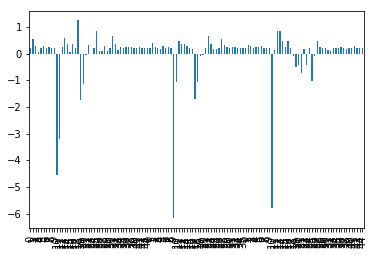

In [25]:
# edge_df
%matplotlib inline
fig, ax = plt.subplots()
edge_df['z_weight'].plot(ax=ax, kind='bar')

In [54]:
for k,v in summary_dict.items():
    test=edge_df[edge_df['group']==k]
    keyz = list(zip(test['source'],test['target']))
    values=test['z_weight']
    up_dict={}
    for i in range(len(keyz)):
        up_dict[keyz[i]]={'z_edge':values[i]}
    nx.set_edge_attributes(v['comm_graph'], up_dict)


In [58]:
summary_dict['ob']['comm_graph'].edges(data=True)

EdgeDataView([(0, 0, {'weight': 6.65795508974359, 'z_edge': 0.22307762216209612}), (0, 1, {'weight': 0.9875995384615381, 'z_edge': 0.3082620740780772}), (0, 2, {'weight': 0.886660628205128, 'z_edge': 0.2995556850890917}), (0, 3, {'weight': -0.13270837179487185, 'z_edge': 0.21163098870819777}), (0, 4, {'weight': 0.2652431282051283, 'z_edge': 0.24595591404124334}), (0, 5, {'weight': 0.20460096153846155, 'z_edge': 0.24072528206004098}), (0, 6, {'weight': 0.5071846153846155, 'z_edge': 0.2668243452003215}), (0, 7, {'weight': -0.06306864102564103, 'z_edge': 0.21763769696000043}), (0, 8, {'weight': -0.040346384615384596, 'z_edge': 0.2195975834152101}), (1, 1, {'weight': 56.76909293589743, 'z_edge': 0.22307762216209612}), (1, 2, {'weight': -69.8420087948718, 'z_edge': -5.801077926928399}), (1, 3, {'weight': -0.8431240128205109, 'z_edge': 0.15035476828024924}), (1, 4, {'weight': 7.152836320512822, 'z_edge': 0.8400386654578218}), (1, 5, {'weight': 7.3683165769230765, 'z_edge': 0.858624708510876}

In [ ]:
an.module_fig(summary_dict['no']['modules']['graph'], 'Normal', basepath)

# Using visbrain to look at the cifti files

In [ ]:
# Scene creation
sc = SceneObj(bgcolor='black', size=(1400, 1000))
# Colorbar default arguments. See `visbrain.objects.ColorbarObj`
CBAR_STATE = dict(cbtxtsz=12, txtsz=10., width=.1, cbtxtsh=3.,
                  rect=(-.3, -2., 1., 4.))
KW = dict(title_size=14., zoom=1.2)


In [ ]:
# Download the annotation file of the left hemisphere lh.aparc.a2009s.annot
path_to_file1 = download_file('lh.aparc.a2009s.annot', astype='example_data')
# Define the brain object (now you should know how to do it)
b_obj_parl = BrainObj('inflated', hemisphere='left', translucent=False)
# Print parcellates included in the file
# print(b_obj_parl.get_parcellates(path_to_file1))
# Finally, parcellize the brain and add the brain to the scene
b_obj_parl.parcellize(path_to_file1)
sc.add_to_subplot(b_obj_parl, row=1, col=1, rotate='left',
                  title='Parcellize using the Desikan Atlas', **KW)


In [ ]:
# Download the lh.sig.nii.gz file
file = download_file('lh.sig.nii.gz', astype='example_data')
# Define the [...] you know
b_obj_fmri = BrainObj('inflated', translucent=False, sulcus=True)
# Add fMRI activation and hide every activation that is under 5.
b_obj_fmri.add_activation(file=file, clim=(5., 20.), hide_under=5,
                          cmap='viridis', hemisphere='left')
sc.add_to_subplot(b_obj_fmri, row=2, col=1, title='Add fMRI activation',
                  rotate='left', **KW)


In [ ]:
# Link the rotation of subplots (row=0, col=1) and (row=1, col=2)
# sc.link((0, 1), (1, 2))
# Screenshot of the scene
# sc.screenshot('ex_brain_obj.png', transparent=True)

sc.preview()